## Auto reload

In [1]:
%load_ext autoreload
%autoreload 2

## LIB

In [3]:
%reload_ext autoreload

# Basic lib
import pandas as pd
import numpy as np
import os
import sys

# config
import yaml

# Custom lib
from src.loader import Loader
from src.loan_preprocessor import Loan_Preprocessor
from src.log_preprocessor import Log_Preprocessor
from src.user_preprocessor import User_Preprocessor

## Load Config

In [4]:
with open("config.yaml", 'r') as config_file:
    config_dict = yaml.load(config_file, Loader=yaml.FullLoader)

## Load Data

In [5]:
loader_config = config_dict.get('Loader')

In [6]:
loader_config = config_dict.get('Loader')
loader = Loader(loader_config)
loan_df = loader.run('loan_result.csv')
log_df = loader.run('log_data.csv')
user_df = loader.run('user_spec.csv')

## Preprocess

In [7]:
prep_config = config_dict.get('Preprocessor')

# Loan preprocess
loan_preprocessor = Loan_Preprocessor(loan_df, prep_config)
prep_loan_df = loan_preprocessor.run(
    save_file_name='prep_loan.fth',
    save_mode=True
    )

loan prep1
loan prep2
loan prep3
✅ prep dataset saved at (prep\prep_loan.fth)


In [8]:
# Log preprocess
log_preprocessor = Log_Preprocessor(log_df, prep_config)
prep_log_df = log_preprocessor.run(
    save_file_name='prep_log.fth',
    save_mode=True
)

loan prep1
loan prep2
loan prep3
✅ prep dataset saved at (prep\prep_log.fth)


In [9]:
# User preprocess
user_preprocessor = User_Preprocessor(user_df, prep_config)
prep_user_df = user_preprocessor.run(
    save_file_name='prep_user.fth',
    save_mode=True
)

loan prep1
loan prep2
loan prep3
✅ prep dataset saved at (prep\prep_user.fth)


## EDA

Checking Distributions...


3it [00:00, 88.23it/s]


Done!


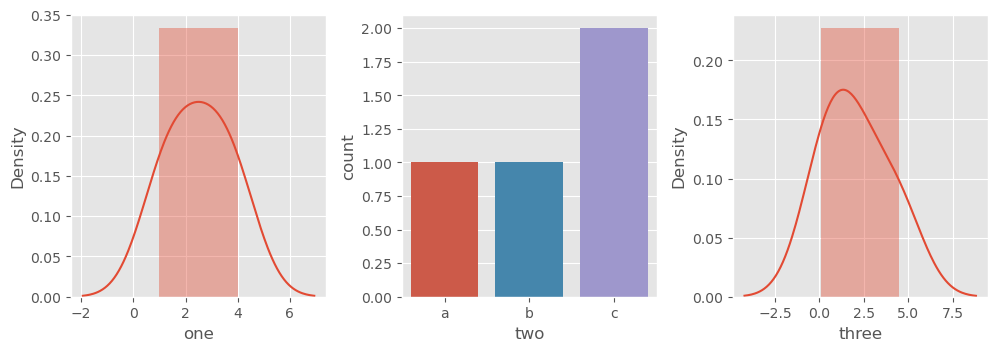

In [17]:
from src.eda import EDA, EDAPreprocessing
import pandas as pd


df = pd.DataFrame({'one' : [1,2,3,4],
                   'two' :  ['a','b','c','c'],
                    'three' : [1.1,2.4,4.5,0.1]}
                    )

a = EDA(df, 'test')
a.check_distributions()

변수간 상관 관계를 확인합니다...
Done!!


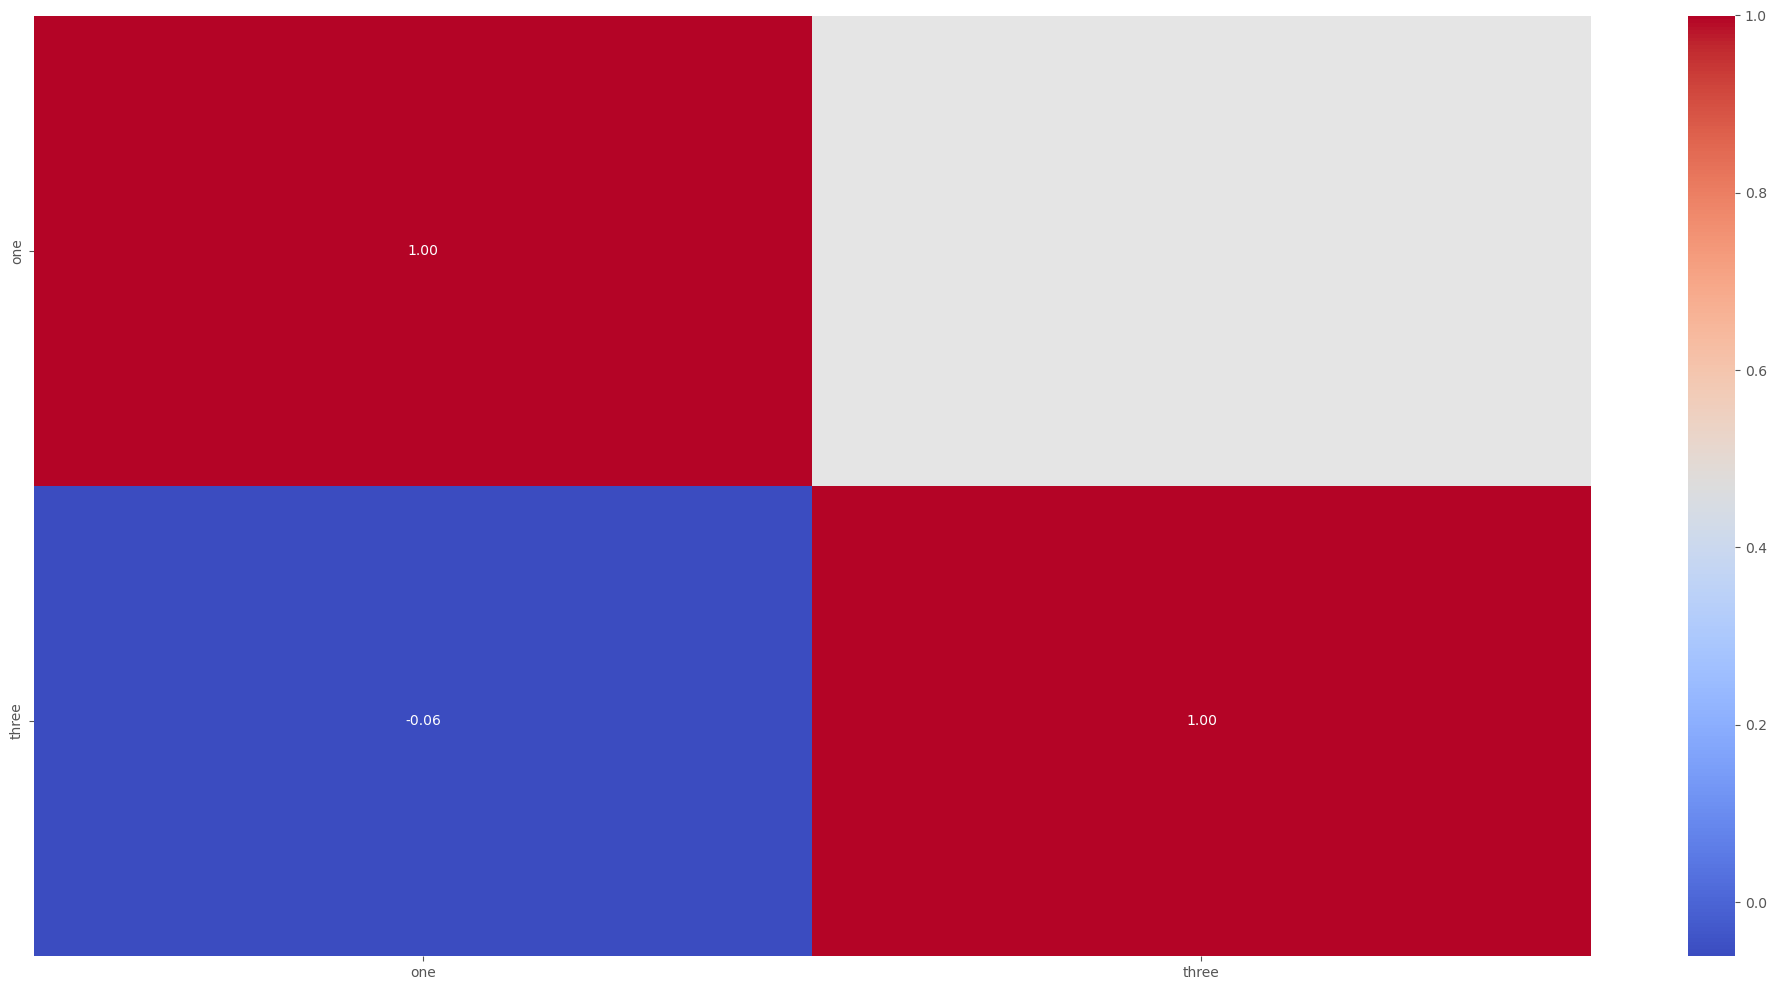

In [14]:
b= EDA(df, 'heatmap_test')
b.check_corr()

이상치를 확인합니다...
파악된 연속형 변수
 ['one', 'three']
Done!!


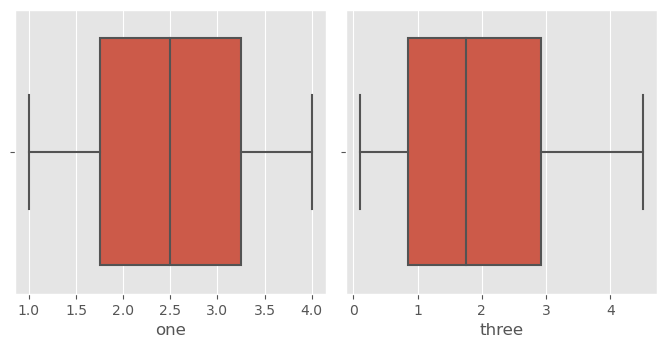

In [15]:
c= EDA(df, 'outlier_test')

c.check_outliers()

In [16]:
trainer = EDAPreprocessing(df)
after = trainer.diet_dataframe()

diet_dataframe 함수의 소요시간
: 0.00초


## Modeling

## Inference

## Evaluation